In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_vandermonde(x):
    V = np.zeros((len(x),len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            V[i][j] = x[i]**j
    return V

def make_coef(x, y):
    V = create_vandermonde(x)
    return np.linalg.solve(V,y)

def interp(x, coeffs):
    return np.polyval(np.flip(coeffs, 0), x)
    

In [3]:
def f_prob1(x):
    return 1/(1+(10*x)**2)

def create_interp_n(a,b,n,f):
    x_data = np.linspace(a,b,n)
    y_data = f(x_data)
    c = make_coef(x_data, y_data)

    x_test = np.linspace(a,b,1001)
    y_test = interp(x_test, c)

    return (x_test, y_test)

def driver_prob1(n_max):

    x_test = np.linspace(-1,1,1001)
    y_real = f_prob1(x_test)

    plt.scatter(x_test,y_real)
    
    for n in range(2,n_max+1):
        (x_interp, y_interp) = create_interp_n(-1,1,n,f_prob1)
        plt.plot(x_interp, y_interp, label = str(n))
    plt.legend()
    plt.show()    
    

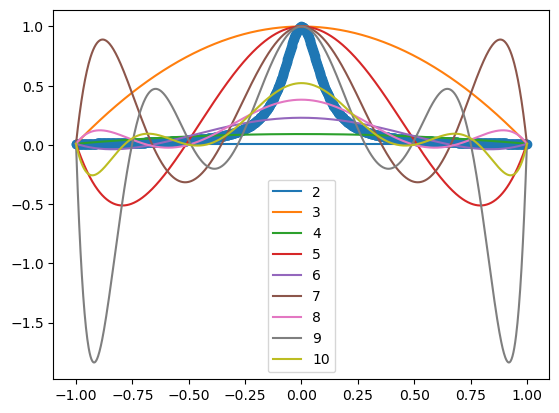

In [4]:
driver_prob1(10)   #Plotting polyfits up to order 10

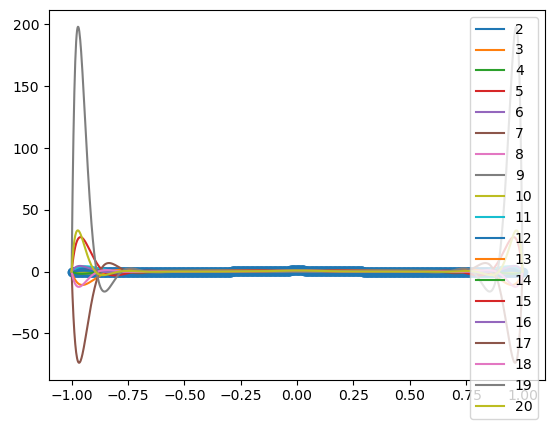

In [5]:
driver_prob1(20)   #Plotting polyfits up to order 20

In [6]:
def calc_barys_coef(x):
    w = np.zeros(len(x))
    for i in range(len(x)):
        w[i] = 1/np.prod(x[i] - np.delete(x,i))
    return w

def eval_barys_coefs(x, x_data, y_data):
    p_top = 0
    p_bottom = 0
    w = calc_barys_coef(x_data)
    
    for i in range(len(x_data)):
        if x != x_data[i]:
            W = w[i]/(x - x_data[i])
            p_top += W*y_data[i]
            p_bottom += W
        else:
            return y_data[i]
    return p_top/p_bottom

def lagrange_bary_interp(x, x_data, y_data):
    return np.array([eval_barys_coefs(x[i],x_data,y_data) for i in range(len(x))])
    

In [7]:
def create_interp_n_bary(a,b,n,f):
    x_data = np.linspace(a,b,n)
    y_data = f(x_data)

    x_test = np.linspace(a,b,1001)
    y_test = lagrange_bary_interp(x_test, x_data, y_data)

    return (x_test, y_test)

def driver_prob2(n_max):

    x_test = np.linspace(-1,1,1001)
    y_real = f_prob1(x_test)

    plt.scatter(x_test,y_real)
    
    for n in range(2,n_max+1):
        (x_interp, y_interp) = create_interp_n_bary(-1,1,n,f_prob1)
        plt.plot(x_interp, y_interp, label = str(n))

    plt.legend()
    plt.show()  

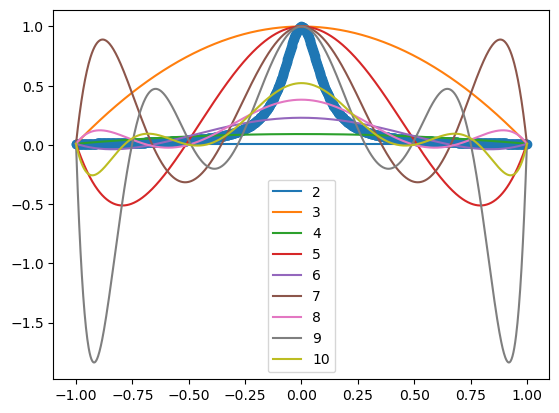

In [8]:
driver_prob2(10)

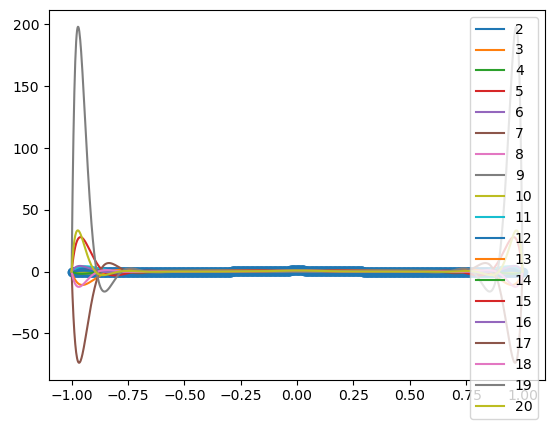

In [9]:
driver_prob2(20)

In [10]:
def create_interp_n_bary_chevy(a,b,n,f):

    x_data = np.cos((2*np.arange(1,n+1)-1)*np.pi/(2*n))
    # print(x_data)
    y_data = f(x_data)
    # print(x_data)

    x_test = np.linspace(a,b,1001)
    y_test = lagrange_bary_interp(x_test, x_data, y_data)

    return (x_test, y_test)

def driver_prob3(n_max):

    x_test = np.linspace(-1,1,1001)
    y_real = f_prob1(x_test)

    plt.scatter(x_test,y_real)
    
    for n in range(2,n_max+1):
        (x_interp, y_interp) = create_interp_n_bary_chevy(-1,1,n,f_prob1)
        try:
            plt.plot(x_interp, y_interp, label = str(n))
        except all:
            pass

    # plt.legend()
    plt.show()  

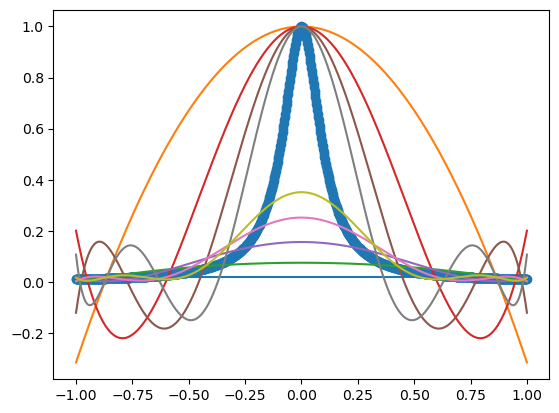

In [11]:
driver_prob3(10)

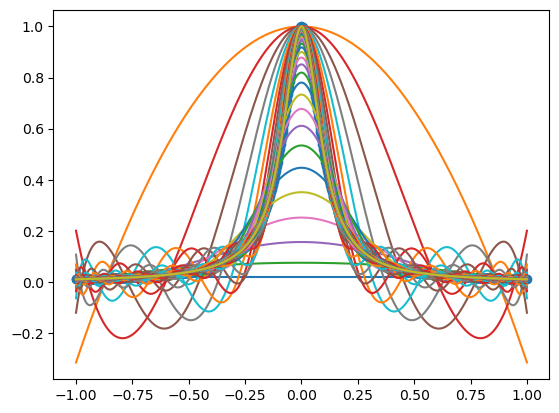

In [12]:
driver_prob3(100)